# Ensamble Classifiers - Emotion

In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
from sklearn import tree
from IPython.display import Image
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

## Data Preparation

In [33]:
X_train = pd.read_csv("X_train_minmax_norm_E.csv", sep = ',',  delim_whitespace=False)
y_train = pd.read_csv("y_train_minmax_norm_E.csv", sep = ',',  delim_whitespace=False)
X_test = pd.read_csv("X_test_minmax_norm_E.csv", sep = ',',  delim_whitespace=False) 
y_test = pd.read_csv("y_test_minmax_norm_E.csv", sep = ',',  delim_whitespace=False) 


In [46]:
#eliminiamo tutte le colonne con soli valori nulli
X_train.dropna(axis='columns', how='all', inplace=True)

In [47]:
#eliminiamo tutte le colonne con soli valori nulli
X_test.dropna(axis='columns', how='all', inplace=True)

In [51]:
X_train = X_train.values
y_train =y_train.values
X_test = X_test.values
y_test = y_test.values

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

In [62]:
clf = RandomForestClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split=4,
                             n_estimators=400, max_features='log2', n_jobs=-1, criterion ='entropy')
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

ValueError: Unknown label type: 'continuous'

In [57]:
classification_report(y_test, y_pred, output_dict=True)

NameError: name 'y_pred' is not defined

In [12]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"0": {"precision": 0.5, "recall": 0.3125, "f1-score": 0.38461538461538464, "support": 48}, "1": {"precision": 0.46206896551724136, "recall": 0.6979166666666666, "f1-score": 0.5560165975103735, "support": 96}, "2": {"precision": 0.35353535353535354, "recall": 0.3645833333333333, "f1-score": 0.358974358974359, "support": 96}, "3": {"precision": 0.3793103448275862, "recall": 0.22916666666666666, "f1-score": 0.28571428571428575, "support": 96}, "4": {"precision": 0.6229508196721312, "recall": 0.7916666666666666, "f1-score": 0.6972477064220183, "support": 96}, "5": {"precision": 0.49230769230769234, "recall": 0.3333333333333333, "f1-score": 0.3975155279503106, "support": 96}, "6": {"precision": 0.5681818181818182, "recall": 0.5208333333333334, "f1-score": 0.5434782608695652, "support": 48}, "7": {"precision": 0.4098360655737705, "recall": 0.5208333333333334, "f1-score": 0.45871559633027525, "support": 48}, "accuracy": 0.47596153846153844, "macro avg": {"precision": 0.4735238824519492, "re

In [13]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'0': {'precision': 0.5,
  'recall': 0.3125,
  'f1-score': 0.38461538461538464,
  'support': 48},
 '1': {'precision': 0.46206896551724136,
  'recall': 0.6979166666666666,
  'f1-score': 0.5560165975103735,
  'support': 96},
 '2': {'precision': 0.35353535353535354,
  'recall': 0.3645833333333333,
  'f1-score': 0.358974358974359,
  'support': 96},
 '3': {'precision': 0.3793103448275862,
  'recall': 0.22916666666666666,
  'f1-score': 0.28571428571428575,
  'support': 96},
 '4': {'precision': 0.6229508196721312,
  'recall': 0.7916666666666666,
  'f1-score': 0.6972477064220183,
  'support': 96},
 '5': {'precision': 0.49230769230769234,
  'recall': 0.3333333333333333,
  'f1-score': 0.3975155279503106,
  'support': 96},
 '6': {'precision': 0.5681818181818182,
  'recall': 0.5208333333333334,
  'f1-score': 0.5434782608695652,
  'support': 48},
 '7': {'precision': 0.4098360655737705,
  'recall': 0.5208333333333334,
  'f1-score': 0.45871559633027525,
  'support': 48},
 'accuracy': 0.47596153846153

In [14]:
from sklearn.inspection import permutation_importance

In [15]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

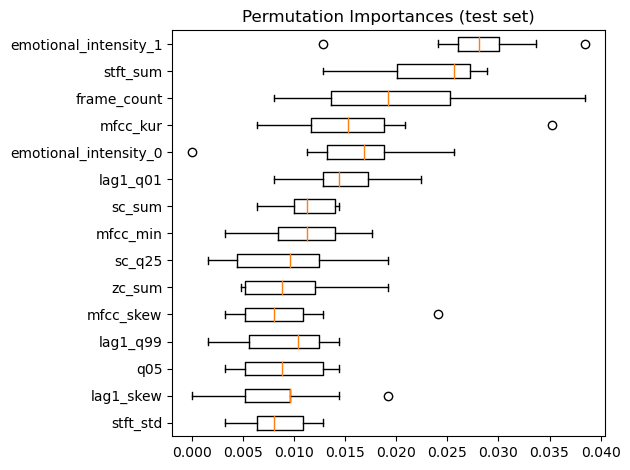

In [18]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(X_train.columns)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [17]:
from sklearn.tree import plot_tree

In [18]:
clf.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=4, random_state=606506842)

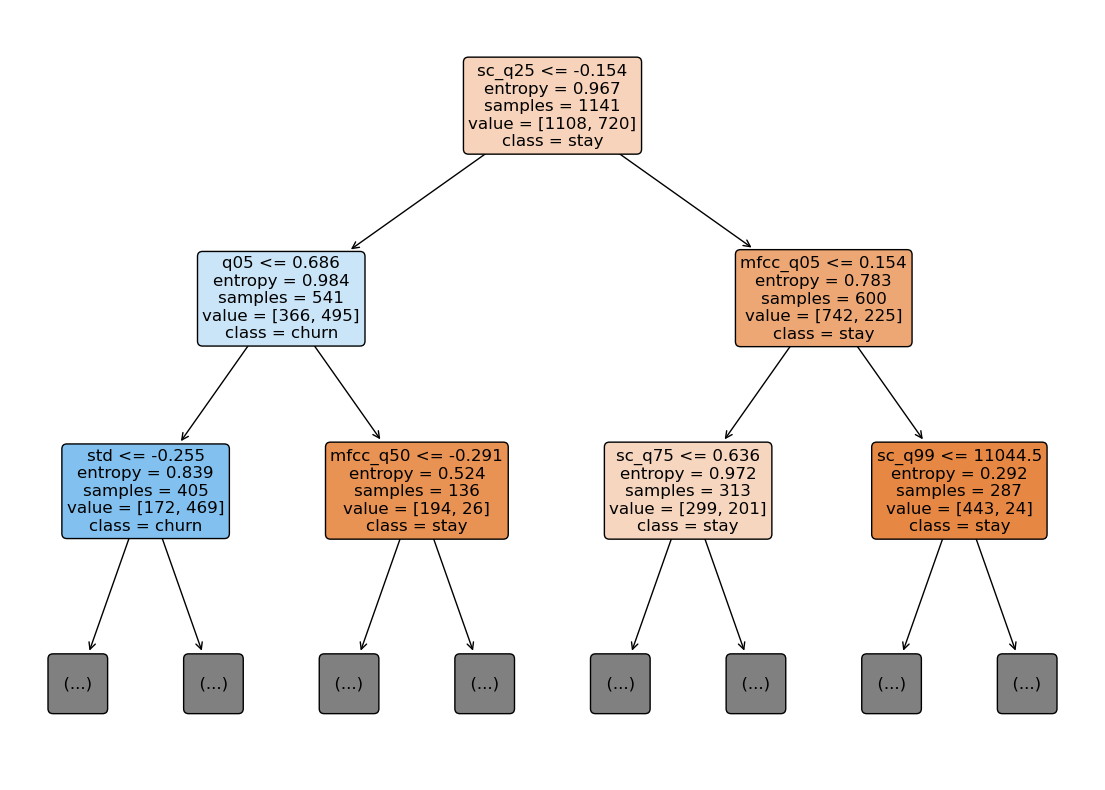

In [19]:
plt.figure(figsize=(14,10))
plot_tree(clf.estimators_[0], 
          feature_names=X_train.columns, 
          class_names=['stay', 'churn'], 
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

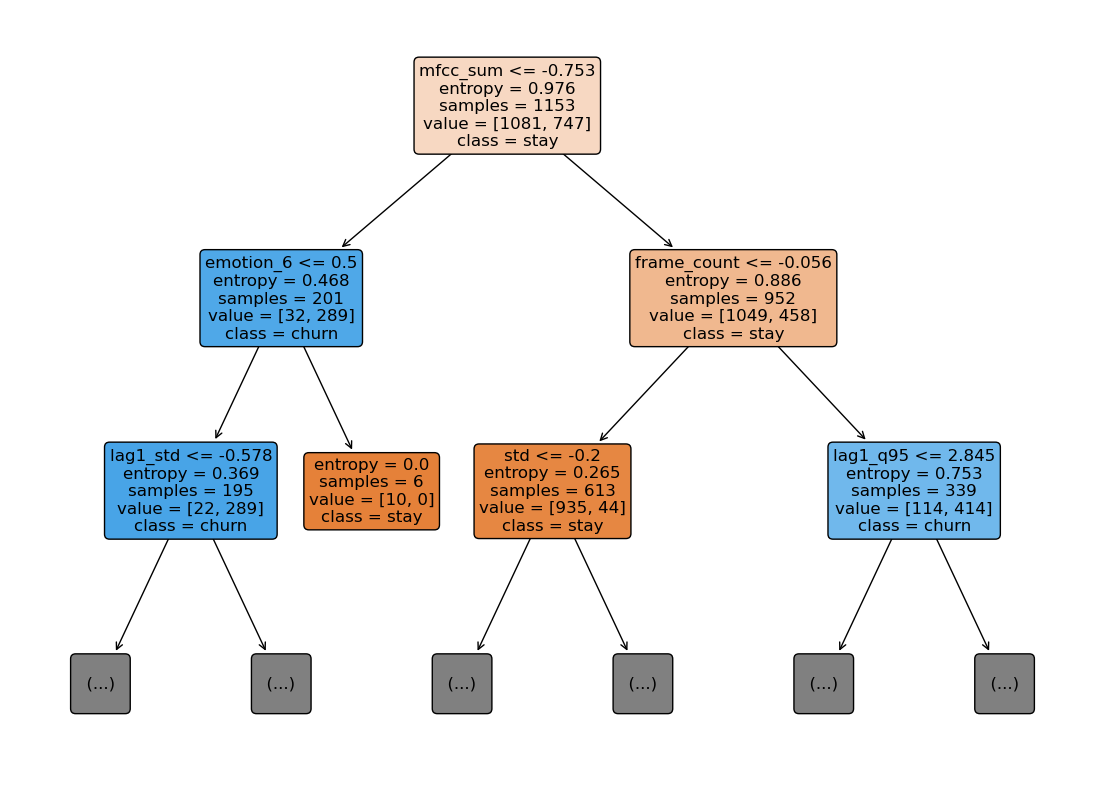

In [21]:
plt.figure(figsize=(14,10))
plot_tree(clf.estimators_[1], 
          feature_names=X_train.columns, 
          class_names=['stay', 'churn'], 
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

In [15]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

/var/folders/k2/_q7jj7754nn3_3h7vr9wvn2c0000gn/T/ipykernel_4647/3786953409.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy 0.9647435897435898
F1-score [0.96986301 0.95752896]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       360
           1       0.98      0.94      0.96       264

    accuracy                           0.96       624
   macro avg       0.97      0.96      0.96       624
weighted avg       0.97      0.96      0.96       624



In [23]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

/var/folders/k2/_q7jj7754nn3_3h7vr9wvn2c0000gn/T/ipykernel_721/3479101166.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy 0.9663461538461539
F1-score [0.97119342 0.95953757]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       360
           1       0.98      0.94      0.96       264

    accuracy                           0.97       624
   macro avg       0.97      0.96      0.97       624
weighted avg       0.97      0.97      0.97       624



In [24]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

/var/folders/k2/_q7jj7754nn3_3h7vr9wvn2c0000gn/T/ipykernel_721/2311089136.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy 0.9647435897435898
F1-score [0.96961326 0.95801527]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       360
           1       0.97      0.95      0.96       264

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624



### Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score

In [25]:
#L'errore che mi da qui è legato al fatto che la lunghezza del train e del test sono differenti.. 
# devo guardare bene l'altra cross validation 
# dove ho messo y_train, prima c'era y_test

clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y wa

Accuracy 0.956 +/- 0.026


### Tuning the hyper-parameters

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [29]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y wa

Accuracy 0.9711538461538461
F1-score [0.97527473 0.96538462]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       360
           1       0.98      0.95      0.97       264

    accuracy                           0.97       624
   macro avg       0.97      0.97      0.97       624
weighted avg       0.97      0.97      0.97       624



In [30]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y wa

Accuracy 0.9631410256410257
F1-score [0.96844993 0.95568401]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       360
           1       0.97      0.94      0.96       264

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624



In [31]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 2, 'min_samples_leaf': 30, 'max_depth': 14}

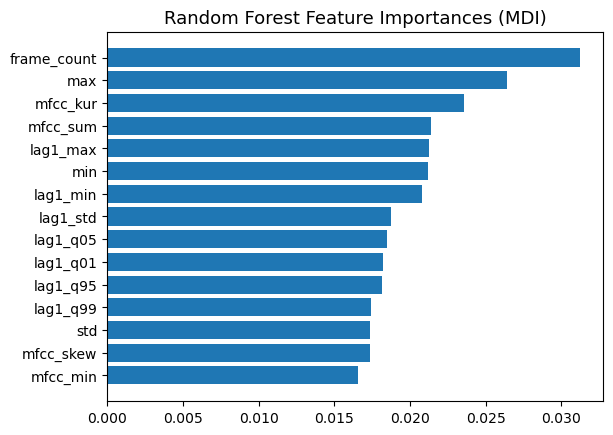

In [17]:
# Feature Importance
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(X_train.columns)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)", size=13)
plt.show()

### Tuning the hyper-parameters

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [28]:
param_list = {'max_depth': [None],    
             'min_samples_split': [2, 4, 7, 10, 15],
             'min_samples_leaf': [1, 2, 3, 5, 10], 
             'criterion': ['entropy'],
             'max_features': ['auto', 'sqrt', 'log2'],
             'n_estimators' : [5,20,50,100,200,300,400]
             }

In [ ]:
grid_search = GridSearchCV(clf, param_grid=param_list, cv=5, n_jobs=-1)
grid_search.fit(X_train, np.ravel(y_train))
clf_gs = grid_search.best_estimator_

In [ ]:
clf_gs = grid_search.best_estimator_
clf_gs

In [ ]:
grid_search.best_params_

### Roc Curve

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from yellowbrick import ROCAUC

In [31]:
#Binarize FARE ATTENZIONE PERCHE' DOPO SBALLA LE CLASSI
y_test1 = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
y_train1 = label_binarize(y_train, classes=[0,1,2,3,4,5,6,7])

NameError: name 'label_binarize' is not defined

In [21]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(clf)   
classifier.fit(X_train, y_train1)
y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

In [22]:
# Compute ROC curve and ROC area for each class
CLASS_LABELS = [ "0" , "1", "2", "3", "4", "5", "6", "7"]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(CLASS_LABELS)):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

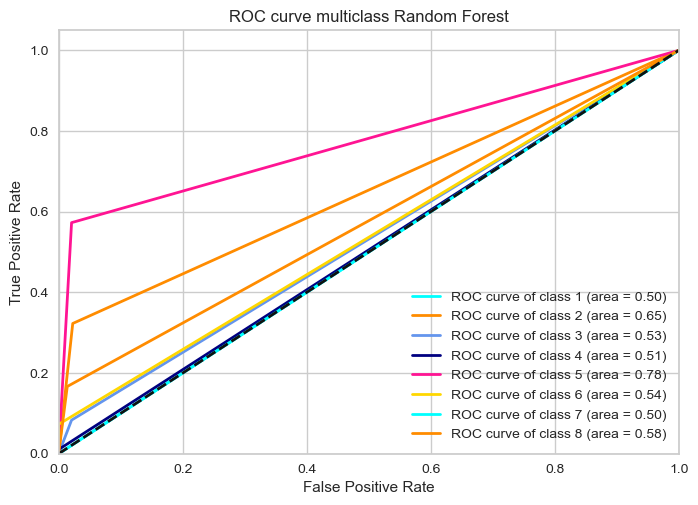

In [23]:
#plot
lw=2
colors = cycle(["aqua", "darkorange", "cornflowerblue","navy", "deeppink", "gold"])
for i, color in zip(range(len(CLASS_LABELS)), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve multiclass Random Forest")
plt.legend(loc="lower right")
plt.show()

## Bagging

In [24]:
from sklearn.svm import SVC
# Base estimator con DecTree, SVC o Rand forest

In [25]:
clf1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0)
clf1.fit(X_train, np.ravel(y_train))

y_pred = clf1.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

NameError: name 'BaggingClassifier' is not defined

In [ ]:
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=100, random_state=0, n_jobs=-1)
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0, n_jobs= -1)
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

### Tuning the hyper-parameters

In [ ]:
#GS adaboostclassif
abc = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split=4,
                                                               n_estimators=400, max_features='log2'), random_state=1)

parameters = {'n_estimators':list(range(40, 400, 20)), 
              'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

gs = GridSearchCV(abc, parameters, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, np.ravel(y_train))

In [ ]:
print("Optimal hyperparameter combination:", gs.best_params_)

In [ ]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=220, learning_rate = 0.1, random_state=0)
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

##  Gradient Boosting

In [ ]:
#FEATURE IMPORTANCES + CLASSIFICATION REPORT
from sklearn.ensemble import GradientBoostingClassifier

baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,np.ravel(y_train[0]))
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[:10].plot(kind='barh', title='Importance of Features')

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

### Tuning the hyper-parameters

In [ ]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500],
          'max_features': ['auto', 'sqrt', 'log2']
           }

model = GradientBoostingClassifier(n_estimators=100, random_state=100)

In [ ]:
model_grid_search = GridSearchCV(model, param_grid=params,
                                 n_jobs=-1, cv=3)
model_grid_search.fit(X_train, np.ravel(y_train[0]))

In [ ]:
model_grid_search.best_params_

In [ ]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, max_features='log2', random_state=0)
clf.fit(X_train, y_train[0])

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

## HistGradientBoostingClassifier


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

model=HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4)

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_leaf_nodes': [3,10,15,30],
    'max_depth' : [3,6,10],
    'max_bins' : [50,100,150]
}
model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=-1, cv=3)
model_grid_search.fit(X_train, np.ravel(y_train[0]))

In [ ]:
model_grid_search.best_params_

In [ ]:
clf = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1,
                                     max_depth=3, max_bins=150, # max
                                     random_state=0, max_leaf_nodes=3, loss='categorical_crossentropy')
clf.fit(X_train, np.ravel(y_train[0]))

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

## XGBoost

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
import xgboost as xgb
#TUNING ATTENZIONE CHE LE LABEL DEVONO PARTIRE DA 0 PER QUESTO USIAMO Y_TEST E TRAIN ["NEW"]

#learning_rate [0.05, 0.1]
#max_depth= [3,6,10]
#min_child_weight = 1, 3, 6
#gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting.
#colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
##DOPO AVER IMPOSTATO QUESTI PARAMETRI PER TUNING VEDIAMO DI REGOLARIZZARE L'OVERFITTING

#reg_alpha [1e-5, 1e-2, 0.1, 1, 100] Nel nostro caso lasciandolo di default

#objective='multi:softmax' to multiclass prediction

xgb_model = xgb.XGBClassifier(booster = 'gbtree', random_state=0, objective='multi:softmax',
                              gamma = 0.1, max_depth=3,  min_child_weight=1,
                              use_label_encoder=False, eta=0.4)

xgb_model.fit(X_train, np.ravel(y_train["new"]), eval_metric='mlogloss')
y_pred = xgb_model.predict(X_test)

#Check overfitting
#print('Training set score: {:.4f}'.format(xgb_model.score(X_train, y_train["new"])))
#print('Test set score: {:.4f}'.format(xgb_model.score(X_test, y_test["new"])))

print('Accuracy %s' % accuracy_score(y_test["new"], y_pred))
print('F1-score %s' % f1_score(y_test["new"], y_pred, average=None))
print(classification_report(y_test["new"], y_pred))

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier
#bisogna levare caretteri speciali dai nomi delle features altrimenti si rompe
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


In [ ]:
clf = LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=31,
                     n_estimators=100,
                     subsample_for_bin=200000,
                     objective='multiclass',
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=0.0, #L2 regularization term on weights
                     random_state=42
                   )
clf.fit(X_train, np.ravel(y_train["new"]))

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test["new"], y_pred))
print('F1-score %s' % f1_score(y_test["new"], y_pred, average=None))
print(classification_report(y_test["new"], y_pred))

In [ ]:
import lightgbm as lgb
clf = LGBMClassifier()
clf.fit(X_train, y_train[0])
y_pred=clf.predict(X_test)

### Tuning the hyper-parameters

In [ ]:
#1 num_leaves : This is the main parameter to control the complexity of the tree model. Ideally, the value of num_leaves should be less than or equal to 2^(max_depth). Value more than this will result in overfitting.

#2 min_data_in_leaf : Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.

#3 max_depth : We also can use max_depth to limit the tree depth explicitly.

#FOR FASTER SPEED
#Use bagging by setting bagging_fraction and bagging_freq.
#Use feature sub-sampling by setting feature_fraction.
#Use small max_bin.
#Use save_binary to speed up data loading in future learning.

#FOR BETTER ACCURACY
#Use large max_bin (may be slower).
#Use small learning_rate with large num_iterations
#Use large num_leaves(may cause over-fitting)
#Use bigger training data
#Try dart
#Try to use categorical feature directly

#TO DEAL WITH OVER FITTING
#Use small max_bin
#Use small num_leaves
#Use min_data_in_leaf and min_sum_hessian_in_leaf
#Use bagging by set bagging_fraction and bagging_freq
#Use feature sub-sampling by set feature_fraction
#Use bigger training data
#Try lambda_l1, lambda_l2 and min_gain_to_split to regularization
#Try max_depth to avoid growing deep tree

In [ ]:
#!pip install scikit_optimize

params = {
          'boosting_type': 'gbdt',
          'objective': 'multiclass',
          'metric': 'multi_logloss',
          'num_class':6,
          'max_depth':3,
          'learning_rate': 0.2,
          'n_estimators':150,
          'max_bins' : 8,
          'min_split_gain' : 0.2,
          'min_child_samples':600
         ## REDUCE OVERFITTING
         #'min_data_in_leaf':[50], #primo parametro per ridurre overifitting
         #'colsample_bytree': [0.0], #altri 3 parametri per ridurre overfitt
         #'min_split_gain' : [0.0],
         #'subsample' : [1],
         #'reg_lambda' : 0.5,
         #'reg_alpha': 1, # fattore di regolarizzazione semper per overfitting
         }
          #quando non c'è molta differenza di score tra
          #train e test, we can adjust the max_depth and num_leaves parameter to reduce overfitting.
           

clf = LGBMClassifier(**params)

clf.fit(X_train, y_train[0])
y_pred=clf.predict(X_test)

#Check OVERFITTING --> SE l'accuratezza del modello differisce di molto dal test rispetto al train siamo in overfitting
#print('Training set score: {:.4f}'.format(clf.score(X_train, y_train[0])))
#print('Test set score: {:.4f}'.format(clf.score(X_test, y_test[0])))

print('Accuracy %s' % accuracy_score(y_test[0], y_pred))
print('F1-score %s' % f1_score(y_test[0], y_pred, average=None))
print (classification_report(y_test[0], y_pred))

In [ ]:
#PLOT CHECK OVERFITTING (in questo caso lo vediamo al variare della depth, ma possiamo impostare un qualsiasi valore)
from matplotlib import pyplot

# define lists to collect scores
#rain_scores, test_scores = list(), list()
# define the tree depths to evaluate
#alues = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
#or i in values:
#   # configure the model
#   model = LGBMClassifier(max_depth=i)
#   # fit model on the training dataset
#   model.fit(X_train, np.ravel(y_train[0]))
#   # evaluate on the train dataset
#   train_yhat = model.predict(X_train)
#   train_acc = accuracy_score(y_train[0], train_yhat)
#   train_scores.append(train_acc)
#   # evaluate on the test dataset
#   test_yhat = model.predict(X_test)
#   test_acc = accuracy_score(y_test[0], test_yhat)
#   test_scores.append(test_acc)
#   # summarize progress
#   print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
#   # pot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()